# WELCOME TO OUR MODEL:)

# Install the required libraries !!

In [1]:
#SAM
!pip install git+https://github.com/facebookresearch/segment-anything.git
#Transformers
!pip install -q git+https://github.com/huggingface/transformers.git
#Datasets to prepare data and monai if you want to use special loss functions
!pip install datasets
!pip install -q monai
#Patchify to divide large images into smaller patches for training. (Not necessary for smaller images)
# !pip install patchify
!pip install google-cloud-storage

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-s8u95nya
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-s8u95nya
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done


# Install packages !!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# import tifffile
import os
# from patchify import patchify  #Only to handle large images
import random
from scipy import ndimage
from datasets import Dataset
from PIL import Image
from google.cloud import storage
from io import BytesIO

/home/sarah/.pyenv/versions/3.10.6/envs/solar_potential_map/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load images !! 

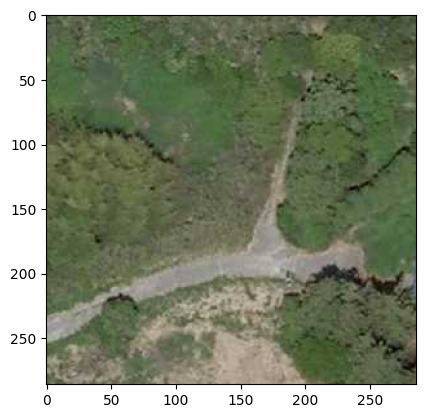

In [27]:
# client = storage.Client()  # Implicit environ set-up
# bucket = client.get_bucket('training_images_solar')
# blob = bucket.blob('original/1.png')
# as_bytes = blob.download_as_bytes()
# im = Image.open(BytesIO(as_bytes))
# as_bytes = blob.download_as_bytes()
# plt.imshow(Image.open(BytesIO(as_bytes)))

In [72]:
from io import BytesIO
import tensorflow as tf

client = storage.Client()  # Implicit environ set-up
# bucket = client.bucket('training_images_solar')
bucket = client.get_bucket('training_images_solar')

def import_data(folder, bucket):

    #get all file names
    file_names = [blob for blob in bucket.list_blobs(prefix=folder)]
    print(file_names)
    
    folder_images = []
    
    for file in file_names:
        #import each picture from specified folder
        blob = bucket.blob(f'{folder}/{file}')
        as_bytes = blob.download_as_bytes()
        im = Image.open(BytesIO(as_bytes))
        #resize w pillow!!
        im = im.resize((286, 286))
        # Transform to tf.Tensor
        img_tf = tf.cast(tf.expand_dims(im, 0), tf.float32)
        folder_images.append(img_tf.numpy().astype(np.uint8)[0])

    return folder_images

# plt.imshow(Image.open(BytesIO(original[2])))
# plt.imshow(Image.open(BytesIO(original[3])))
# plt.imshow(Image.open(BytesIO(original[4])))

In [73]:
import_data('original', bucket)

[<Blob: training_images_solar, original/1.png, 1708165182715945>, <Blob: training_images_solar, original/10.png, 1708165215454792>, <Blob: training_images_solar, original/100.png, 1708165254789217>, <Blob: training_images_solar, original/1000.png, 1708165288557610>, <Blob: training_images_solar, original/1001.png, 1708165778262549>, <Blob: training_images_solar, original/1002.png, 1708165509467581>, <Blob: training_images_solar, original/1003.png, 1708165707835677>, <Blob: training_images_solar, original/1004.png, 1708165272246962>, <Blob: training_images_solar, original/1005.png, 1708165752973029>, <Blob: training_images_solar, original/1006.png, 1708165693699419>, <Blob: training_images_solar, original/1007.png, 1708165173189924>, <Blob: training_images_solar, original/1008.png, 1708165179309718>, <Blob: training_images_solar, original/1009.png, 1708165371778937>, <Blob: training_images_solar, original/101.png, 1708165027904082>, <Blob: training_images_solar, original/1010.png, 17081

NotFound: 404 GET https://storage.googleapis.com/download/storage/v1/b/training_images_solar/o/original%2F%3CBlob%3A%20training_images_solar%2C%20original%2F1.png%2C%201708165182715945%3E?alt=media: No such object: training_images_solar/original/&lt;Blob: training_images_solar, original/1.png, 1708165182715945&gt;: ('Request failed with status code', 404, 'Expected one of', <HTTPStatus.OK: 200>, <HTTPStatus.PARTIAL_CONTENT: 206>)

In [69]:
client = storage.Client()  # Implicit environ set-up
# bucket = client.bucket('training_images_solar')
bucket = client.get_bucket('training_images_solar')
for blob in bucket.list_blobs(prefix='original'):
    print(blob.name)

original/1.png
original/10.png
original/100.png
original/1000.png
original/1001.png
original/1002.png
original/1003.png
original/1004.png
original/1005.png
original/1006.png
original/1007.png
original/1008.png
original/1009.png
original/101.png
original/1010.png
original/1011.png
original/1012.png
original/1013.png
original/1014.png
original/1015.png
original/1016.png
original/1017.png
original/1018.png
original/1019.png
original/102.png
original/1020.png
original/1021.png
original/1022.png
original/1023.png
original/1024.png
original/1025.png
original/1026.png
original/1027.png
original/1028.png
original/1029.png
original/103.png
original/1030.png
original/1031.png
original/1032.png
original/1033.png
original/1034.png
original/1035.png
original/1036.png
original/1037.png
original/1038.png
original/1039.png
original/104.png
original/1040.png
original/1041.png
original/1042.png
original/1043.png
original/1044.png
original/1045.png
original/1046.png
original/1047.png
original/1048.png
or

In [7]:
def bytes_to_array(b: bytes) -> np.ndarray:
    np_bytes = BytesIO(b)
    return np.load(np_bytes)

In [ ]:
def load_data(bucket_name):
    bucket = storage.Client().get_bucket(bucket_name)

    return np.array(
        cv2.imdecode(
            np.asarray(bytearray(blob.download_as_string()), dtype=np.uint8), 0
        ).flatten()
        for blob in bucket.list_blobs()
        if blob.name.endswith(".jpg")
    )

In [ ]:
load_data('training_images_solar/original/1.png')

In [ ]:
bytes_to_array(original[1])

In [ ]:
import io
import numpy as np
from google.cloud import storage

storage_client = storage.Client()
bucket = storage_client.get_bucket('training_images_solar')

blob = bucket.blob('1.png.npy')

with io.BytesIO() as in_memory_file:
  blob.download_to_file(in_memory_file)
  in_memory_file.seek(0)
  image = np.load(in_memory_file)

# then, for example:
print(image)

In [ ]:
from gcsfs import GCSFileSystem
from PIL import Image

gcs = GCSFileSystem(project=GCP_PROJECT)
gcspaths_train = gcs.ls(training_images_solar/original)

is_image_path = lambda p: p.endswith('.jpeg') or p.endswith('.png')
image_gcspath = [
  image_gcspath for image_gcspath in gcspaths_train if is_img_path(is_image_path)
]

images = []
for image_gcspath in image_gcspaths:
    image = Image.open(gcs.open(image_gcspath, 'rb'))
    image = image.convert('RGB')
    images.append(image)

return images

In [ ]:
images

## Delete empty masks

In [ ]:
# Create a list to store the indices of non-empty masks
valid_indices = [i for i, mask in enumerate(masks) if mask.max() != 0]
# Filter the image and mask arrays to keep only the non-empty pairs
filtered_images = images[valid_indices]
filtered_masks = masks[valid_indices]
print("Image shape:", filtered_images.shape)  # e.g., (num_frames, height, width, num_channels)
print("Mask shape:", filtered_masks.shape)

In [ ]:
dataset_dict = {
    "image": [Image.fromarray(img) for img in filtered_images],
    "label": [Image.fromarray(mask) for mask in filtered_masks],
}

# Create the dataset using the datasets.Dataset class
dataset = Dataset.from_dict(dataset_dict)

### Check the dataset

In [ ]:
dataset

## Check that the images are properly loading

In [ ]:
img_num = random.randint(0, filtered_images.shape[0]-1)
example_image = dataset[img_num]["image"]
example_mask = dataset[img_num]["label"]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image on the left
axes[0].imshow(np.array(example_image), cmap='gray')  # Assuming the first image is grayscale
axes[0].set_title("Image")

# Plot the second image on the right
axes[1].imshow(example_mask, cmap='gray')  # Assuming the second image is grayscale
axes[1].set_title("Mask")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Display the images side by side
plt.show()

## Bounding boxes

In [ ]:
#Get bounding boxes from mask.
def get_bounding_box(ground_truth_map):
  # get bounding box from mask
  y_indices, x_indices = np.where(ground_truth_map > 0)
  x_min, x_max = np.min(x_indices), np.max(x_indices)
  y_min, y_max = np.min(y_indices), np.max(y_indices)
  # add perturbation to bounding box coordinates
  H, W = ground_truth_map.shape
  x_min = max(0, x_min - np.random.randint(0, 20))
  x_max = min(W, x_max + np.random.randint(0, 20))
  y_min = max(0, y_min - np.random.randint(0, 20))
  y_max = min(H, y_max + np.random.randint(0, 20))
  bbox = [x_min, y_min, x_max, y_max]

  return bbox